# **Converting categorical features to numerical**

In [ ]:
from sklearn.feature_extraction import DictVectorizer
X_dict = [{'interest': 'tech', 'occupation': 'professional'},
          {'interest': 'fashion', 'occupation': 'student'},
          {'interest': 'fashion', 'occupation': 'professional'},
          {'interest': 'sports', 'occupation': 'student'},
          {'interest': 'tech', 'occupation': 'student'},
          {'interest': 'tech', 'occupation': 'retired'},
          {'interest': 'sports', 'occupation': 'professional'}]
dict_one_hot_encoder = DictVectorizer(sparse=False)
X_encoded = dict_one_hot_encoder.fit_transform(X_dict)
print(X_encoded)

[[0. 0. 1. 1. 0. 0.]
 [1. 0. 0. 0. 0. 1.]
 [1. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 1.]
 [0. 0. 1. 0. 1. 0.]
 [0. 1. 0. 1. 0. 0.]]


We can also see the mapping by executing the following

In [ ]:
print(dict_one_hot_encoder.vocabulary_)

{'interest=tech': 2, 'occupation=professional': 3, 'interest=fashion': 0, 'occupation=student': 5, 'interest=sports': 1, 'occupation=retired': 4}


When it comes to new data, we can transform it with the following

In [ ]:
new_dict = [{'interest': 'sports', 'occupation': 'retired'}]
new_encoded = dict_one_hot_encoder.transform(new_dict)
print(new_encoded)

[[0. 1. 0. 0. 1. 0.]]


We can inversely transform the encoded features back to the original features like this

In [ ]:
print(dict_one_hot_encoder.inverse_transform(new_encoded))

[{'interest=sports': 1.0, 'occupation=retired': 1.0}]


One important thing to note is that if a new category
is encountered in new data, it should be ignored. DictVectorizer handles this implicitly

In [ ]:
new_dict = [{'interest': 'unknown_interest', 'occupation': 'retired'},
            {'interest': 'tech', 'occupation': 'unseen_occupation'}]
new_encoded = dict_one_hot_encoder.transform(new_dict)
print(new_encoded)

[[0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0.]]


We can realize ordinal encoding easily through the use of pandas, for example

In [ ]:
import pandas as pd
df = pd.DataFrame({'score': ['low',
                             'high',
                             'medium',
                             'medium',
                             'low']})
print(df)

mapping = {'low':1, 'medium':2, 'high':3}
df['score'] = df['score'].replace(mapping)

print(df)

# **Getting started with the logistic function**

Define the logistic function

In [ ]:
import numpy as np


def sigmoid(input):
    return 1.0 / (1 + np.exp(-input))

nput variables from -8 to 8, and the corresponding output, as follows

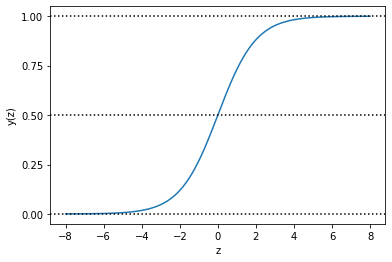

In [ ]:
import matplotlib.pyplot as plt
z = np.linspace(-8, 8, 1000)
y = sigmoid(z)
plt.plot(z, y)
plt.axhline(y=0, ls='dotted', color='k')
plt.axhline(y=0.5, ls='dotted', color='k')
plt.axhline(y=1, ls='dotted', color='k')
plt.yticks([0.0, 0.25, 0.5, 0.75, 1.0])
plt.xlabel('z')
plt.ylabel('y(z)')
plt.show()

plot sample cost vs y_hat (prediction), for y (truth) = 1

<ipython-input-9-138e937b3e2e>:2: RuntimeWarning: divide by zero encountered in log
  cost = -np.log(y_hat)


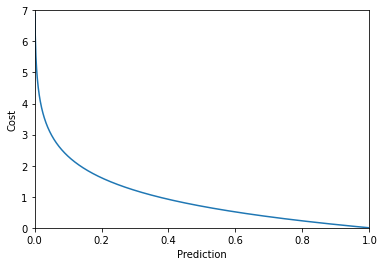

In [ ]:
y_hat = np.linspace(0, 1, 1000)
cost = -np.log(y_hat)
plt.plot(y_hat, cost)
plt.xlabel('Prediction')
plt.ylabel('Cost')
plt.xlim(0, 1)
plt.ylim(0, 7)
plt.show()

 plot sample cost vs y_hat (prediction), for y (truth) = 0

<ipython-input-10-05d0ffbaa753>:2: RuntimeWarning: divide by zero encountered in log
  cost = -np.log(1 - y_hat)


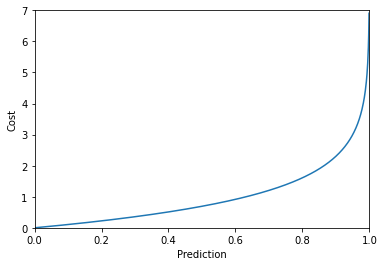

In [ ]:
y_hat = np.linspace(0, 1, 1000)
cost = -np.log(1 - y_hat)
plt.plot(y_hat, cost)
plt.xlabel('Prediction')
plt.ylabel('Cost')
plt.xlim(0, 1)
plt.ylim(0, 7)
plt.show()

# **prepare data**

In [3]:
! pip install -q kaggle
from google.colab import files
files.upload()
! mkdir ~/.kaggle 
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets list

Saving kaggle.json to kaggle.json
mkdir: cannot create directory ‘/root/.kaggle’: File exists
ref                                                             title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
meirnizri/covid19-dataset                                       COVID-19 Dataset                                      5MB  2022-11-13 15:47:17           9390        279  1.0              
mattop/alcohol-consumption-per-capita-2016                      Alcohol Consumption Per Capita 2016                   4KB  2022-12-09 00:03:11            961         33  1.0              
michals22/coffee-dataset                                        Coffee dataset                                       24KB  2022-12-15 20:02:12           1

In [4]:
!kaggle competitions download -c avazu-ctr-prediction

100% 1.19G/1.19G [00:06<00:00, 198MB/s]
100% 1.19G/1.19G [00:06<00:00, 194MB/s]


In [5]:
!unzip /content/avazu-ctr-prediction.zip

Archive:  /content/avazu-ctr-prediction.zip
  inflating: sampleSubmission.gz     
  inflating: test.gz                 
  inflating: train.gz                


In [6]:
!gzip -d /content/train.gz

# **Implementing logistic regression using TensorFlow**



First, we import TensorFlow, transform X_train_enc and X_test_enc into
a numpy array, and cast X_train_enc, Y_train, X_test_enc, and Y_test to
float32


In [ ]:
import tensorflow as tf
import pandas as pd
n_rows = 300000
df = pd.read_csv("train", nrows=n_rows)

X = df.drop(['click', 'id', 'hour', 'device_id', 'device_ip'], axis=1).values
Y = df['click'].values

n_train = int(n_rows * 0.9)
X_train = X[:n_train]
Y_train = Y[:n_train].astype('float32')
X_test = X[n_train:]
Y_test = Y[n_train:].astype('float32')
Y_train = Y_train.astype('float32')
Y_test = Y_test.astype('float32')
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')
X_train_enc = enc.fit_transform(X_train).toarray().astype('float32')
X_test_enc = enc.transform(X_test).toarray().astype('float32')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

We use the tf.data API to shuffle and batch data

In [3]:
batch_size = 1000
train_data = tf.data.Dataset.from_tensor_slices((X_train_enc, Y_train))
train_data = train_data.repeat().shuffle(5000).batch(batch_size).prefetch(1)

NameError: ignored